In [ ]:
#sklearn 1.1.0버전으로 재설치
# !pip uninstall sklearn
# !pip install --upgrade sklearn
# !pip install scikit-learn==1.1.0 --user

In [ ]:
#버전 확인(커널 닫았다가 열기)
# import sklearn
# sklearn.__version__

In [ ]:
# #오버샘플링
# !pip install imblearn

# #lgbm
# !pip install lightgbm

## 데이터 불러오기, 개요 확인

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score

%matplotlib inline

In [2]:
# 코랩용
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
food = pd.read_csv('/content/drive/MyDrive/bigdata/일식 생존.csv', encoding='cp949') #csv 불러오기

In [5]:
food.head() #csv 5행만 보기

,사업장명,소재지면적,교통 수,집객시설 수,교육 수,경쟁자 수,인허가 영업,인허가 폐업,인허가 영업+폐업,타업종비율,...,아파트 세대수,제곱미터 당 임대료,임대료,총생활인구수,점심저녁시간대 생활인구수,골목상권,발달상권,구분불가,전통시장,관광특구
0,참치라이더 중랑점,26,75,8,96,36,469,450,919,0.960827,...,3463,27694.78250,732,16822.95956,15132.65618,1,0,0,0,0
1,두리스시,54,91,92,386,318,1935,1846,3781,0.915895,...,9873,45886.52750,2477,108753.47280,134994.90880,1,0,0,0,0
2,스시운(雲),31,98,15,120,142,1175,1232,2407,0.941005,...,2112,31104.70000,974,20944.66626,18597.21201,1,0,0,0,0
3,술사와,35,93,12,227,76,629,665,1294,0.941267,...,16129,25046.59667,882,23494.27530,24802.59456,1,0,0,0,0
4,스시진,21,90,12,219,73,613,634,1247,0.941460,...,12708,25046.59667,527,23494.27530,24802.59456,1,0,0,0,0


In [6]:
food.info() #데이터 개요 확인 (열이름, 개수,데이터유형)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431 entries, 0 to 2430
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   사업장명           2431 non-null   object 
 1   소재지면적          2431 non-null   int64  
 2   교통 수           2431 non-null   int64  
 3   집객시설 수         2431 non-null   int64  
 4   교육 수           2431 non-null   int64  
 5   경쟁자 수          2431 non-null   int64  
 6   인허가 영업         2431 non-null   int64  
 7   인허가 폐업         2431 non-null   int64  
 8   인허가 영업+폐업      2431 non-null   int64  
 9   타업종비율          2431 non-null   float64
 10  타업종경쟁자         2431 non-null   int64  
 11  버퍼내폐업비율        2431 non-null   float64
 12  영업기간           2431 non-null   int64  
 13  생존여부           2431 non-null   int64  
 14  아파트 세대수        2431 non-null   int64  
 15  제곱미터 당 임대료     2431 non-null   float64
 16  임대료            2431 non-null   int64  
 17  총생활인구수         2431 non-null   float64
 18  점심저녁시간대 

# 결측치 확인 및 전처리

In [7]:
#문자형 변수 확인
object_columns = food.columns[food.dtypes == 'object']
print('object 칼럼은 다음과 같습니다 : ', list(object_columns))

# 해당 칼럼만 보아서 봅시다
food[object_columns]

object 칼럼은 다음과 같습니다 :  ['사업장명']


,사업장명
0,참치라이더 중랑점
1,두리스시
2,스시운(雲)
3,술사와
4,스시진
...,...
2426,나리타 암사점
2427,우레시(암사점)
2428,필살기
2429,강동카츠 암사1호점


In [8]:
feature1columns =list(food.columns.difference(food[object_columns].columns)) #필요없는 문자형 변수 제외
food=food[feature1columns]

In [9]:
food

,경쟁자 수,골목상권,관광특구,교육 수,교통 수,구분불가,발달상권,버퍼내폐업비율,생존여부,소재지면적,...,인허가 영업+폐업,인허가 폐업,임대료,전통시장,점심저녁시간대 생활인구수,제곱미터 당 임대료,집객시설 수,총생활인구수,타업종경쟁자,타업종비율
0,36,1,0,96,75,0,0,0.489663,0,26,...,919,450,732,0,15132.65618,27694.78250,8,16822.95956,883,0.960827
1,318,1,0,386,91,0,0,0.488231,0,54,...,3781,1846,2477,0,134994.90880,45886.52750,92,108753.47280,3463,0.915895
2,142,1,0,120,98,0,0,0.511840,0,31,...,2407,1232,974,0,18597.21201,31104.70000,15,20944.66626,2265,0.941005
3,76,1,0,227,93,0,0,0.513910,0,35,...,1294,665,882,0,24802.59456,25046.59667,12,23494.27530,1218,0.941267
4,73,1,0,219,90,0,0,0.508420,0,21,...,1247,634,527,0,24802.59456,25046.59667,12,23494.27530,1174,0.941460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,67,0,0,216,61,1,0,0.538628,0,81,...,1385,746,2885,0,24113.64599,35804.80750,11,27322.39298,1318,0.951625
2427,46,0,0,335,73,1,0,0.549464,0,30,...,839,461,1069,0,24113.64599,35804.80750,11,27322.39298,793,0.945173
2428,67,0,0,200,61,1,0,0.539817,0,45,...,1419,766,1611,0,24113.64599,35804.80750,10,27322.39298,1352,0.952784
2429,46,0,0,335,73,1,0,0.549464,0,15,...,839,461,536,0,24113.64599,35804.80750,8,27322.39298,793,0.945173


In [10]:
feature2columns =list(food.columns.difference(food[['영업기간',"제곱미터 당 임대료"]].columns)) #추가로 필요없는 변수 제외
food=food[feature2columns]

In [11]:
food

,경쟁자 수,골목상권,관광특구,교육 수,교통 수,구분불가,발달상권,버퍼내폐업비율,생존여부,소재지면적,...,인허가 영업,인허가 영업+폐업,인허가 폐업,임대료,전통시장,점심저녁시간대 생활인구수,집객시설 수,총생활인구수,타업종경쟁자,타업종비율
0,36,1,0,96,75,0,0,0.489663,0,26,...,469,919,450,732,0,15132.65618,8,16822.95956,883,0.960827
1,318,1,0,386,91,0,0,0.488231,0,54,...,1935,3781,1846,2477,0,134994.90880,92,108753.47280,3463,0.915895
2,142,1,0,120,98,0,0,0.511840,0,31,...,1175,2407,1232,974,0,18597.21201,15,20944.66626,2265,0.941005
3,76,1,0,227,93,0,0,0.513910,0,35,...,629,1294,665,882,0,24802.59456,12,23494.27530,1218,0.941267
4,73,1,0,219,90,0,0,0.508420,0,21,...,613,1247,634,527,0,24802.59456,12,23494.27530,1174,0.941460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,67,0,0,216,61,1,0,0.538628,0,81,...,639,1385,746,2885,0,24113.64599,11,27322.39298,1318,0.951625
2427,46,0,0,335,73,1,0,0.549464,0,30,...,378,839,461,1069,0,24113.64599,11,27322.39298,793,0.945173
2428,67,0,0,200,61,1,0,0.539817,0,45,...,653,1419,766,1611,0,24113.64599,10,27322.39298,1352,0.952784
2429,46,0,0,335,73,1,0,0.549464,0,15,...,378,839,461,536,0,24113.64599,8,27322.39298,793,0.945173


In [12]:
#출처 : https://dacon.io/competitions/official/235959/codeshare/5934?page&dtype&ptype&fType
# 먼저 결측치가 얼마나 있는지 확인합니다. 
# csv형태에서 먼저 결측치있는 행을 제거하여 null값이 없습니다

food.isna().sum()

경쟁자 수            0
골목상권             0
관광특구             0
교육 수             0
교통 수             0
구분불가             0
발달상권             0
버퍼내폐업비율          0
생존여부             0
소재지면적            0
아파트 세대수          0
인허가 영업           0
인허가 영업+폐업        0
인허가 폐업           0
임대료              0
전통시장             0
점심저녁시간대 생활인구수    0
집객시설 수           0
총생활인구수           0
타업종경쟁자           0
타업종비율            0
dtype: int64

# EDA

In [13]:
food.describe(include="all") #데이터의 통계적인 개요 확인

,경쟁자 수,골목상권,관광특구,교육 수,교통 수,구분불가,발달상권,버퍼내폐업비율,생존여부,소재지면적,...,인허가 영업,인허가 영업+폐업,인허가 폐업,임대료,전통시장,점심저녁시간대 생활인구수,집객시설 수,총생활인구수,타업종경쟁자,타업종비율
count,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,...,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000
mean,151.651172,0.278486,0.003702,237.038256,84.202386,0.402715,0.278486,0.486001,0.160428,74.774578,...,983.844097,1936.449609,952.605512,2964.078568,0.036610,38181.205910,35.140271,34909.084776,1784.798437,0.926842
std,117.345654,0.448346,0.060745,205.190825,28.025932,0.490545,0.448346,0.060701,0.367078,81.618384,...,542.445409,1089.367272,575.444872,3575.421621,0.187842,25066.819133,58.106668,19254.428760,980.958488,0.023589
min,4.000000,0.000000,0.000000,6.000000,19.000000,0.000000,0.000000,0.307808,0.000000,3.000000,...,49.000000,100.000000,35.000000,134.000000,0.000000,6177.561535,0.000000,5070.050660,94.000000,0.802030
25%,69.000000,0.000000,0.000000,116.000000,64.000000,0.000000,0.000000,0.456973,0.000000,32.000000,...,580.500000,1166.000000,560.000000,1125.000000,0.000000,21363.760510,9.000000,22162.714700,1082.500000,0.910112
50%,108.000000,0.000000,0.000000,183.000000,81.000000,0.000000,0.000000,0.500345,0.000000,51.000000,...,840.000000,1609.000000,775.000000,1907.000000,0.000000,31725.043970,14.000000,30535.698870,1503.000000,0.929366
75%,195.000000,1.000000,0.000000,297.000000,103.000000,1.000000,1.000000,0.528204,0.000000,88.000000,...,1321.000000,2576.000000,1274.500000,3367.000000,0.000000,49722.936530,23.000000,43196.661730,2385.500000,0.945169
max,511.000000,1.000000,1.000000,1657.000000,173.000000,1.000000,1.000000,0.641694,1.000000,1317.000000,...,2660.000000,5091.000000,2807.000000,53311.000000,1.000000,134994.908800,321.000000,108753.472800,4623.000000,0.983051


In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'

In [14]:
#한글 폰트 지정 - 코랩용
#plt.rcParams['font.family'] = 'NanumGothic'

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44428 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44264 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_te

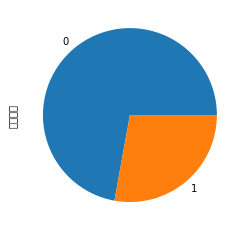

In [15]:
food['골목상권'].value_counts().plot(kind="pie") #범주형 데이터 확인

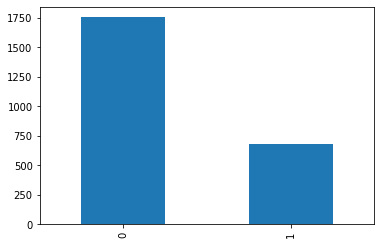

In [17]:
food['골목상권'].value_counts().plot(kind="bar") #범주형 데이터 확인

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45804 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45804 missing from current font.
  font.set_text(s, 0, flags=flags)


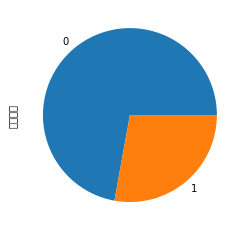

In [18]:
food['발달상권'].value_counts().plot(kind="pie") #범주형 데이터 확인

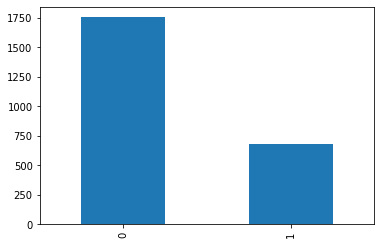

In [19]:
food['발달상권'].value_counts().plot(kind="bar") #범주형 데이터 확인

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_te

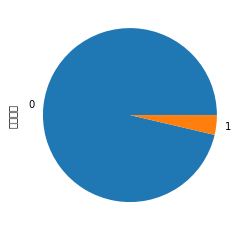

In [20]:
food['전통시장'].value_counts().plot(kind="pie") #범주형 데이터 확인

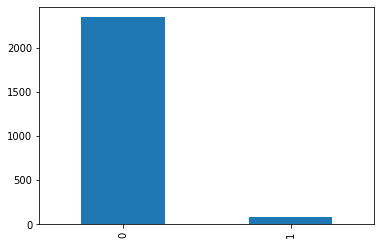

In [21]:
food['전통시장'].value_counts().plot(kind="bar") #범주형 데이터 확인

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_te

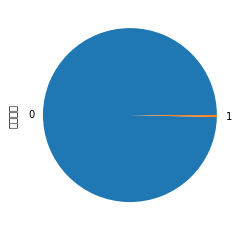

In [22]:
food['관광특구'].value_counts().plot(kind="pie")#범주형 데이터 확인

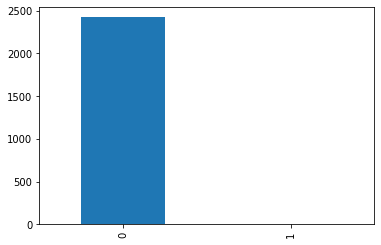

In [23]:
food['관광특구'].value_counts().plot(kind="bar")#범주형 데이터 확인

In [24]:
food['생존여부'].value_counts() #범주형 target 데이터 확인

0    2041
1     390
Name: 생존여부, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51316 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51316 missing from current font.
  font.set_te

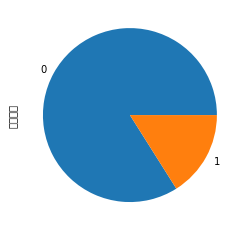

In [25]:
food['생존여부'].value_counts().plot(kind="pie") #원그래프로 범주형 데이터 확인 

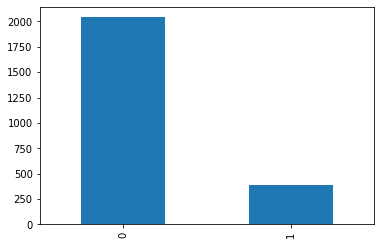

In [26]:
food['생존여부'].value_counts().plot(kind="bar") #막대그래프로 범주형 데이터 확인, 폐업이 더 많이 차지합니다. 데이터가 불균형합니다

In [27]:
food.columns

Index(['경쟁자 수', '골목상권', '관광특구', '교육 수', '교통 수', '구분불가', '발달상권', '버퍼내폐업비율',
       '생존여부', '소재지면적', '아파트 세대수', '인허가 영업', '인허가 영업+폐업', '인허가 폐업', '임대료',
       '전통시장', '점심저녁시간대 생활인구수', '집객시설 수', '총생활인구수', '타업종경쟁자', '타업종비율'],
      dtype='object')

In [28]:
#연속형 변수 기초통계량 확인
food[["교통 수","집객시설 수","교육 수","경쟁자 수","인허가 영업","인허가 폐업","인허가 영업+폐업"]].describe()
# 교통 수 제외 모두 이상치 많이 있을 것으로 예상(mean, min, max, 분산 확인결과)

,교통 수,집객시설 수,교육 수,경쟁자 수,인허가 영업,인허가 폐업,인허가 영업+폐업
count,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000
mean,84.202386,35.140271,237.038256,151.651172,983.844097,952.605512,1936.449609
std,28.025932,58.106668,205.190825,117.345654,542.445409,575.444872,1089.367272
min,19.000000,0.000000,6.000000,4.000000,49.000000,35.000000,100.000000
25%,64.000000,9.000000,116.000000,69.000000,580.500000,560.000000,1166.000000
50%,81.000000,14.000000,183.000000,108.000000,840.000000,775.000000,1609.000000
75%,103.000000,23.000000,297.000000,195.000000,1321.000000,1274.500000,2576.000000
max,173.000000,321.000000,1657.000000,511.000000,2660.000000,2807.000000,5091.000000


In [29]:
#연속형 변수 기초통계량 확인
food[["타업종비율","타업종경쟁자","버퍼내폐업비율","아파트 세대수","임대료","총생활인구수",
      "점심저녁시간대 생활인구수"]].describe()
#타업종비율, 타업종경쟁자 버퍼내폐업비율 제외 모두 이상치 많이 있을 것으로 예상(mean, min, max, 분산 확인결과)

,타업종비율,타업종경쟁자,버퍼내폐업비율,아파트 세대수,임대료,총생활인구수,점심저녁시간대 생활인구수
count,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000
mean,0.926842,1784.798437,0.486001,9593.020979,2964.078568,34909.084776,38181.205910
std,0.023589,980.958488,0.060701,6638.232702,3575.421621,19254.428760,25066.819133
min,0.802030,94.000000,0.307808,0.000000,134.000000,5070.050660,6177.561535
25%,0.910112,1082.500000,0.456973,4471.000000,1125.000000,22162.714700,21363.760510
50%,0.929366,1503.000000,0.500345,8338.000000,1907.000000,30535.698870,31725.043970
75%,0.945169,2385.500000,0.528204,13049.000000,3367.000000,43196.661730,49722.936530
max,0.983051,4623.000000,0.641694,38382.000000,53311.000000,108753.472800,134994.908800


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

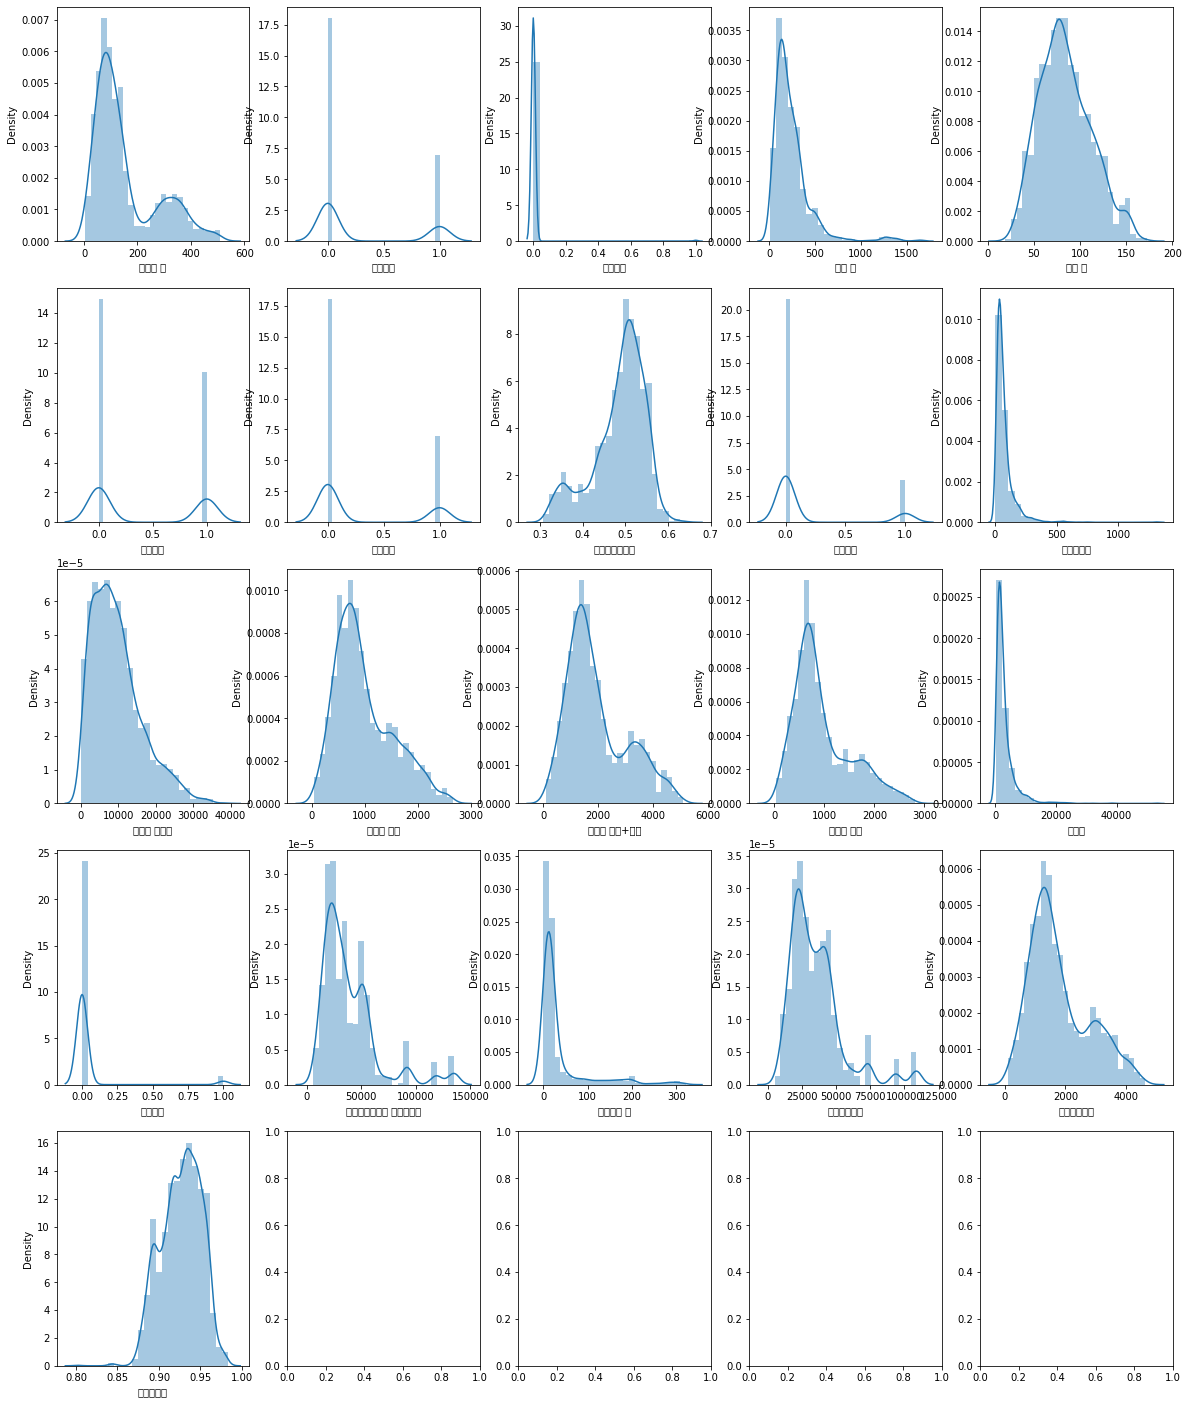

In [30]:
col_n = 5
row_n = 5

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

for i,col in enumerate(food.columns):
    sns.distplot(food[col], bins=25, ax=ax[int(i/col_n),int(i%col_n)])
#출처: https://csshark.tistory.com/56 [컴퓨터하는 상어:티스토리] 
#전체 히스토그램그려보기

In [31]:
for col in food:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(food[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(food[col].kurt())  
         ) #왜도 첨도 확인
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리]
#log변환 필요한 변수(왜도가 -1~1 밖의 값) : 
#'경쟁자 수','교육 수','소재지면적','임대료','점심저녁시간대 생활인구수','집객시설 수','총생활인구수

경쟁자 수           Skewness: 01.16     Kurtosis: 000.26
골목상권            Skewness: 00.99     Kurtosis: -01.02
관광특구            Skewness: 16.35     Kurtosis: 265.66
교육 수            Skewness: 03.08     Kurtosis: 013.62
교통 수            Skewness: 00.42     Kurtosis: -00.28
구분불가            Skewness: 00.40     Kurtosis: -01.84
발달상권            Skewness: 00.99     Kurtosis: -01.02
버퍼내폐업비율         Skewness: -0.91     Kurtosis: 000.34
생존여부            Skewness: 01.85     Kurtosis: 001.43
소재지면적           Skewness: 05.32     Kurtosis: 053.64
아파트 세대수         Skewness: 01.00     Kurtosis: 000.83
인허가 영업          Skewness: 00.81     Kurtosis: -00.03
인허가 영업+폐업       Skewness: 00.82     Kurtosis: -00.18
인허가 폐업          Skewness: 00.99     Kurtosis: 000.29
임대료             Skewness: 05.27     Kurtosis: 047.82
전통시장            Skewness: 04.94     Kurtosis: 022.40
점심저녁시간대 생활인구수   Skewness: 01.97     Kurtosis: 004.42
집객시설 수          Skewness: 02.87     Kurtosis: 008.01
총생활인구수          Skewness: 01.76     Kurtosis: 

In [32]:
#출처 - https://soo-jjeong.tistory.com/122
Afood1=food.copy()
Arob = Afood1[Afood1.columns.difference([ '경쟁자 수','교육 수','소재지면적','임대료','점심저녁시간대 생활인구수','집객시설 수','총생활인구수',
                                 '골목상권','관광특구','구분불가','발달상권','전통시장','생존여부'])] #로버스트스케일링할 데이터
Adis =Afood1[['골목상권','관광특구','구분불가','발달상권','전통시장','생존여부']] #범주형 변수 데이터
Alog =Afood1[['경쟁자 수','교육 수','소재지면적','임대료','점심저녁시간대 생활인구수','집객시설 수','총생활인구수']] #log변환 데이터

In [33]:
Alog.head()#log변환할 데이터

,경쟁자 수,교육 수,소재지면적,임대료,점심저녁시간대 생활인구수,집객시설 수,총생활인구수
0,36,96,26,732,15132.65618,8,16822.95956
1,318,386,54,2477,134994.90880,92,108753.47280
2,142,120,31,974,18597.21201,15,20944.66626
3,76,227,35,882,24802.59456,12,23494.27530
4,73,219,21,527,24802.59456,12,23494.27530


In [34]:
Adis.head()#범주형 데이터

,골목상권,관광특구,구분불가,발달상권,전통시장,생존여부
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [35]:
Arob.head()#로버스트 스케일링 데이터

,교통 수,버퍼내폐업비율,아파트 세대수,인허가 영업,인허가 영업+폐업,인허가 폐업,타업종경쟁자,타업종비율
0,75,0.489663,3463,469,919,450,883,0.960827
1,91,0.488231,9873,1935,3781,1846,3463,0.915895
2,98,0.511840,2112,1175,2407,1232,2265,0.941005
3,93,0.513910,16129,629,1294,665,1218,0.941267
4,90,0.508420,12708,613,1247,634,1174,0.941460


In [36]:
Alog.columns #로그변환할 열 이름

Index(['경쟁자 수', '교육 수', '소재지면적', '임대료', '점심저녁시간대 생활인구수', '집객시설 수', '총생활인구수'], dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:21

Skewness: -0.386
Kurtosis: 0.876


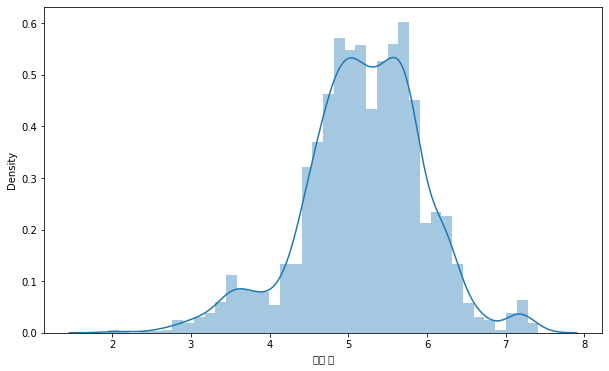

In [37]:
Alog["교육 수"] = np.log1p(Alog["교육 수"])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog["교육 수"])

print("Skewness: {:.3f}".format(Alog["교육 수"].skew()))
print("Kurtosis: {:.3f}".format(Alog["교육 수"].kurt()))#교육 수 log변환
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:21

Skewness: 0.354
Kurtosis: 0.262


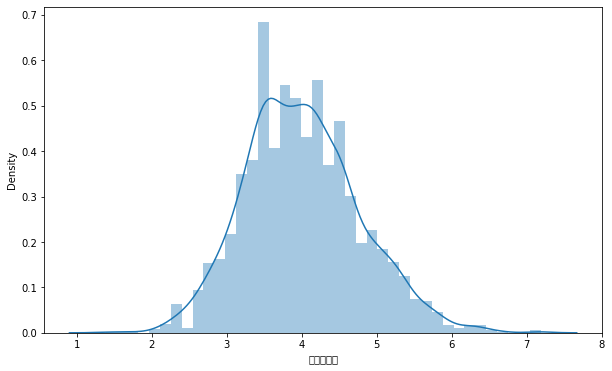

In [38]:
Alog["소재지면적"] = np.log1p(Alog["소재지면적"])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog["소재지면적"])

print("Skewness: {:.3f}".format(Alog["소재지면적"].skew()))
print("Kurtosis: {:.3f}".format(Alog["소재지면적"].kurt()))#소재지면적 log변환
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:21

Skewness: -0.192
Kurtosis: -0.059


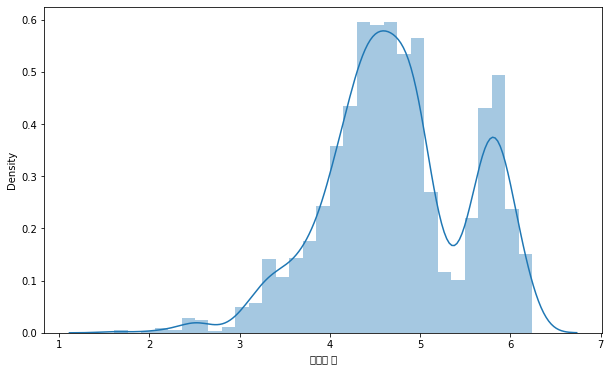

In [39]:
Alog['경쟁자 수'] = np.log1p(Alog['경쟁자 수'])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog['경쟁자 수'])

print("Skewness: {:.3f}".format(Alog['경쟁자 수'].skew()))
print("Kurtosis: {:.3f}".format(Alog['경쟁자 수'].kurt()))#경쟁자 수 log 변환
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:21

Skewness: 0.356
Kurtosis: 0.177


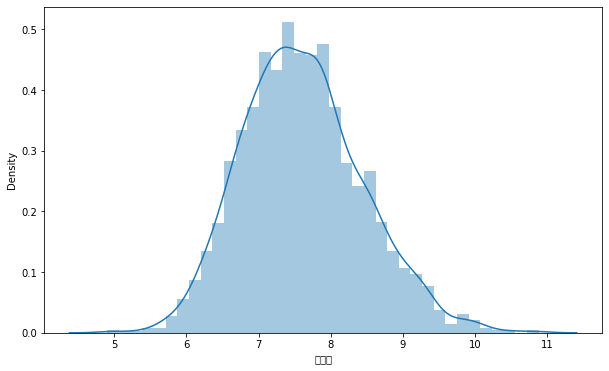

In [40]:
Alog['임대료'] = np.log1p(Alog['임대료'])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog['임대료'])

print("Skewness: {:.3f}".format(Alog['임대료'].skew()))
print("Kurtosis: {:.3f}".format(Alog['임대료'].kurt()))#입대료 log 변환
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:21

Skewness: 0.273
Kurtosis: -0.053


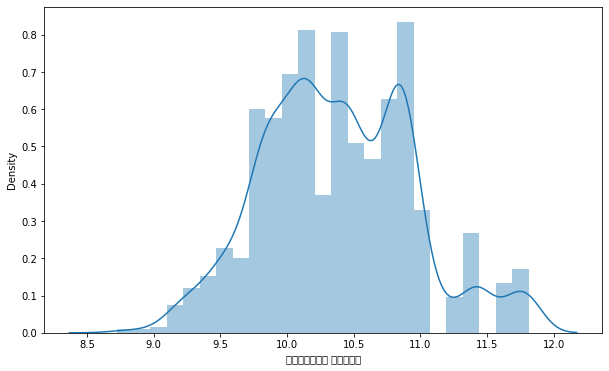

In [41]:
Alog['점심저녁시간대 생활인구수'] = np.log1p(Alog['점심저녁시간대 생활인구수'])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog['점심저녁시간대 생활인구수'])

print("Skewness: {:.3f}".format(Alog['점심저녁시간대 생활인구수'].skew()))
print("Kurtosis: {:.3f}".format(Alog['점심저녁시간대 생활인구수'].kurt()))#점심저녁시간대 생활인구수 log 변환
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:21

Skewness: 0.924
Kurtosis: 0.799


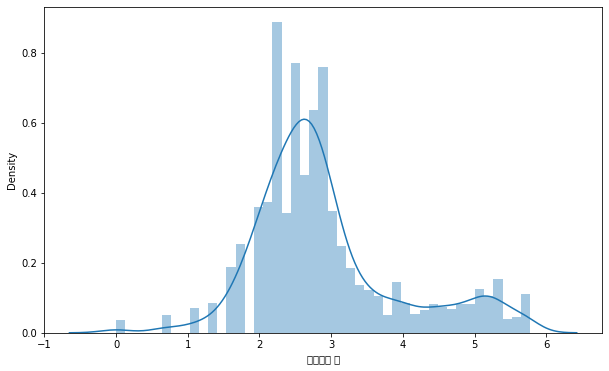

In [42]:
Alog['집객시설 수'] = np.log1p(Alog['집객시설 수'])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog['집객시설 수'])

print("Skewness: {:.3f}".format(Alog['집객시설 수'].skew()))
print("Kurtosis: {:.3f}".format(Alog['집객시설 수'].kurt()))#집객시설 수 log 변환
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:21

Skewness: 0.144
Kurtosis: 0.100


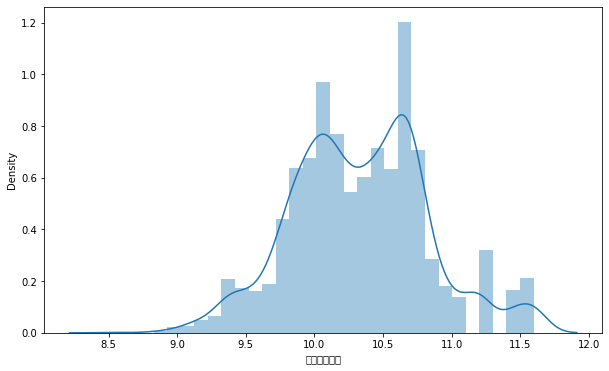

In [43]:
Alog['총생활인구수'] = np.log1p(Alog['총생활인구수'])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog['총생활인구수'])

print("Skewness: {:.3f}".format(Alog['총생활인구수'].skew()))
print("Kurtosis: {:.3f}".format(Alog['총생활인구수'].kurt()))#총생활인구수 log 변환
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

In [44]:
Alog.head() #결과

,경쟁자 수,교육 수,소재지면적,임대료,점심저녁시간대 생활인구수,집객시설 수,총생활인구수
0,3.610918,4.574711,3.295837,6.597146,9.624676,2.197225,9.730559
1,5.765191,5.958425,4.007333,7.815207,11.813000,4.532599,11.596848
2,4.962845,4.795791,3.465736,6.882437,9.830821,2.772589,9.949687
3,4.343805,5.429346,3.583519,6.783325,10.118744,2.564949,10.064555
4,4.304065,5.393628,3.091042,6.269096,10.118744,2.564949,10.064555


In [45]:
scaler = RobustScaler() #로버스트 스케일링
df_robust = scaler.fit_transform(Arob)

In [46]:
robust = pd.DataFrame(df_robust, columns =Arob.columns)#스케일링값 데이터프레임화

In [47]:
robust #결과값 확인

,교통 수,버퍼내폐업비율,아파트 세대수,인허가 영업,인허가 영업+폐업,인허가 폐업,타업종경쟁자,타업종비율
0,-0.153846,-0.149966,-0.568314,-0.501013,-0.489362,-0.454864,-0.475825,0.897427
1,0.256410,-0.170071,0.178946,1.478731,1.540426,1.498950,1.504221,-0.384272
2,0.435897,0.161385,-0.725810,0.452397,0.565957,0.639608,0.584804,0.332007
3,0.307692,0.190443,0.908254,-0.284943,-0.223404,-0.153954,-0.218726,0.339480
4,0.230769,0.113368,0.509443,-0.306550,-0.256738,-0.197341,-0.252494,0.344960
...,...,...,...,...,...,...,...,...
2426,-0.512821,0.537453,0.002332,-0.271438,-0.158865,-0.040588,-0.141980,0.634923
2427,-0.205128,0.689571,0.909419,-0.623903,-0.546099,-0.439468,-0.544896,0.450885
2428,-0.512821,0.554140,0.002332,-0.252532,-0.134752,-0.012596,-0.115886,0.667987
2429,-0.205128,0.689571,0.909419,-0.623903,-0.546099,-0.439468,-0.544896,0.450885


In [48]:
robust[['경쟁자 수','교육 수','소재지면적','임대료','점심저녁시간대 생활인구수','집객시설 수','총생활인구수'
]]=Alog #연속형 변수 데이터프레임 합치기

In [49]:
robust

,교통 수,버퍼내폐업비율,아파트 세대수,인허가 영업,인허가 영업+폐업,인허가 폐업,타업종경쟁자,타업종비율,경쟁자 수,교육 수,소재지면적,임대료,점심저녁시간대 생활인구수,집객시설 수,총생활인구수
0,-0.153846,-0.149966,-0.568314,-0.501013,-0.489362,-0.454864,-0.475825,0.897427,3.610918,4.574711,3.295837,6.597146,9.624676,2.197225,9.730559
1,0.256410,-0.170071,0.178946,1.478731,1.540426,1.498950,1.504221,-0.384272,5.765191,5.958425,4.007333,7.815207,11.813000,4.532599,11.596848
2,0.435897,0.161385,-0.725810,0.452397,0.565957,0.639608,0.584804,0.332007,4.962845,4.795791,3.465736,6.882437,9.830821,2.772589,9.949687
3,0.307692,0.190443,0.908254,-0.284943,-0.223404,-0.153954,-0.218726,0.339480,4.343805,5.429346,3.583519,6.783325,10.118744,2.564949,10.064555
4,0.230769,0.113368,0.509443,-0.306550,-0.256738,-0.197341,-0.252494,0.344960,4.304065,5.393628,3.091042,6.269096,10.118744,2.564949,10.064555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,-0.512821,0.537453,0.002332,-0.271438,-0.158865,-0.040588,-0.141980,0.634923,4.219508,5.379897,4.406719,7.967627,10.090575,2.484907,10.215498
2427,-0.205128,0.689571,0.909419,-0.623903,-0.546099,-0.439468,-0.544896,0.450885,3.850148,5.817111,3.433987,6.975414,10.090575,2.484907,10.215498
2428,-0.512821,0.554140,0.002332,-0.252532,-0.134752,-0.012596,-0.115886,0.667987,4.219508,5.303305,3.828641,7.385231,10.090575,2.397895,10.215498
2429,-0.205128,0.689571,0.909419,-0.623903,-0.546099,-0.439468,-0.544896,0.450885,3.850148,5.817111,2.772589,6.285998,10.090575,2.197225,10.215498


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

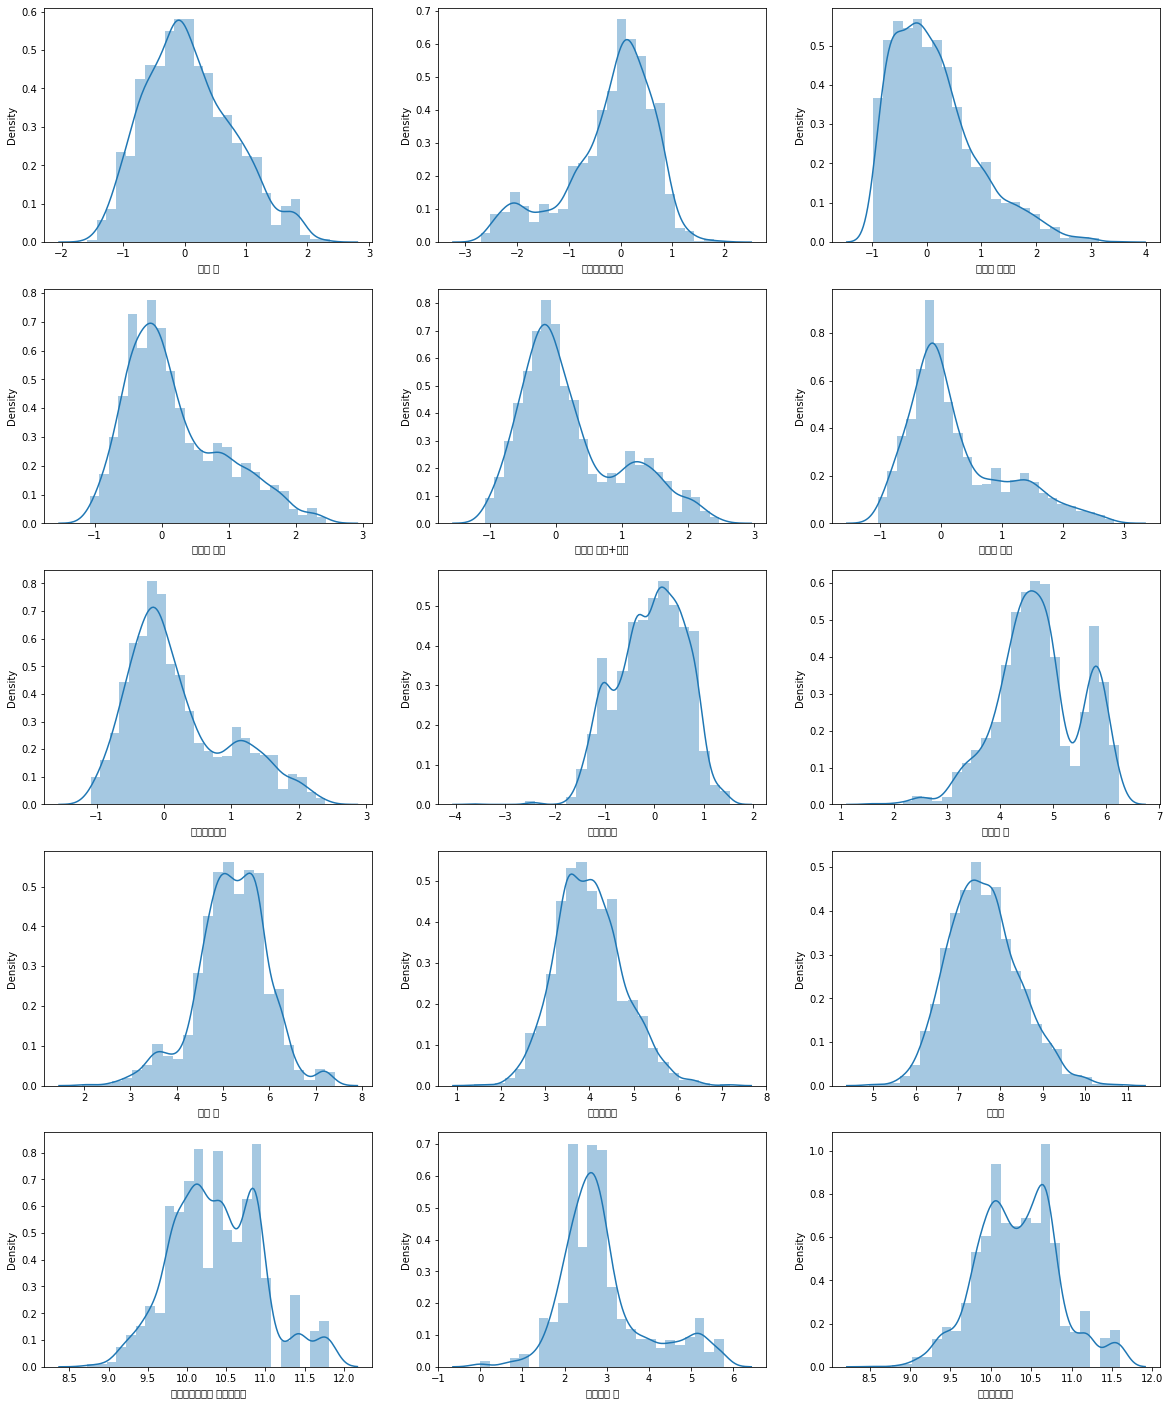

In [50]:
col_n = 3
row_n = 5

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))
for i,col in enumerate(robust.columns):
    sns.distplot(robust[col], bins=25, ax=ax[int(i/col_n),int(i%col_n)])
#연속형변수 전체 히스토그램그려보기    
#출처: https://csshark.tistory.com/56 [컴퓨터하는 상어:티스토리] 

# 다중공선성 확인

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'

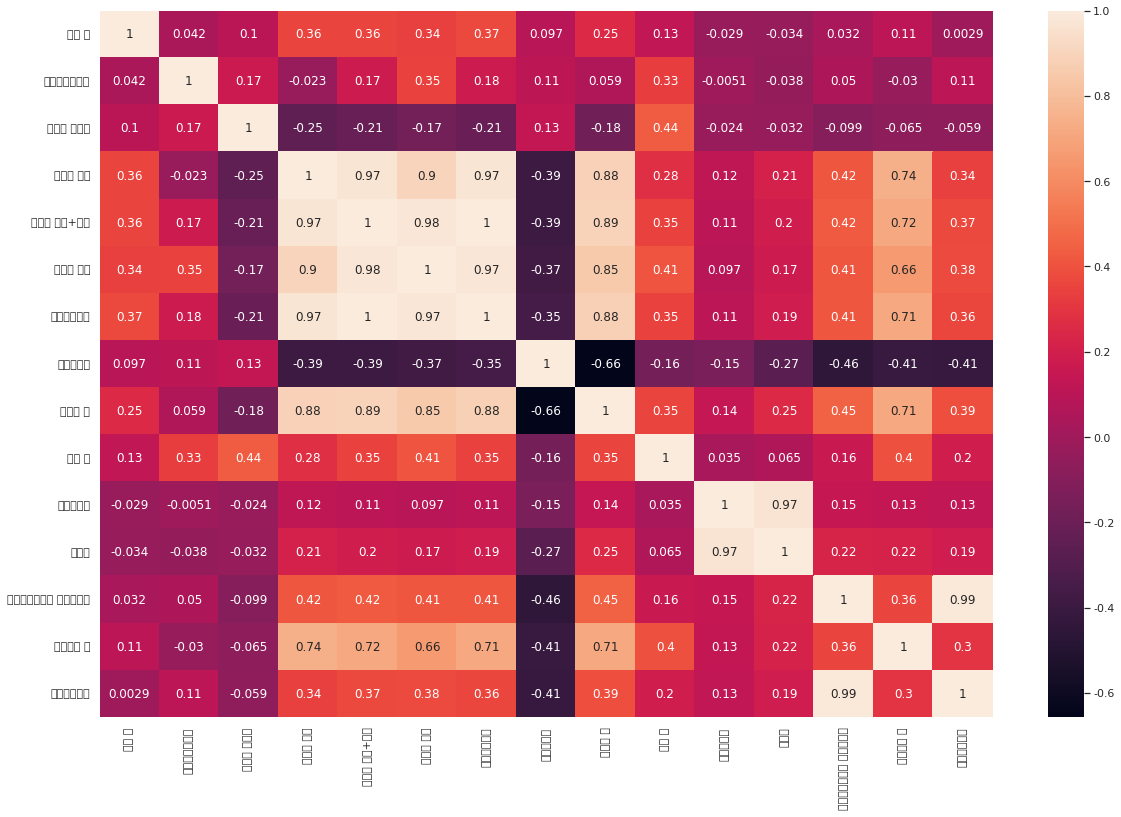

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
#히트맵그리기
#annot = True으로 상관계수값나오게함, 양일수록 밝게, 음일수록 어둡게
plt.rc("font", family = "Malgun Gothic")
sns.set(rc = {'figure.figsize':(20,13),"axes.unicode_minus":False},font="Malgun Gothic", style='white')
sns.heatmap(robust.corr(), annot = True) 
plt.show()

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#다중공선성 확인
vif=pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(robust.values, i) for i in range(robust.shape[1])] #x_data.shape[1]는 변수를 뜻함
vif['features'] = robust.columns
vif

,VIF Factor,features
0,1.465350e+00,교통 수
1,4.118890e+00,버퍼내폐업비율
2,1.661389e+00,아파트 세대수
3,1.853230e+07,인허가 영업
4,7.594315e+07,인허가 영업+폐업
5,2.134794e+07,인허가 폐업
6,2.511642e+03,타업종경쟁자
7,1.019150e+01,타업종비율
8,1.373248e+01,경쟁자 수
9,2.176569e+00,교육 수


In [53]:
vif = pd.DataFrame()
x_data2 = robust.drop('인허가 영업+폐업', axis=1) #인허가 영업+폐업 칼럼을 제거
vif["VIF Factor"] = [variance_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]
vif['features'] = x_data2.columns
vif

,VIF Factor,features
0,1.445285,교통 수
1,4.284695,버퍼내폐업비율
2,1.667347,아파트 세대수
3,669.856405,인허가 영업
4,738.185580,인허가 폐업
5,2532.510404,타업종경쟁자
6,7.156449,타업종비율
7,332.568058,경쟁자 수
8,99.852448,교육 수
9,475.380268,소재지면적


In [54]:
vif = pd.DataFrame()
x_data3 = x_data2.drop('인허가 영업', axis=1) #인허가 영업 칼럼을 제거
vif["VIF Factor"] = [variance_inflation_factor(x_data3.values, i) for i in range(x_data3.shape[1])]
vif['features'] = x_data3.columns
vif

,VIF Factor,features
0,1.445116,교통 수
1,4.255945,버퍼내폐업비율
2,1.655950,아파트 세대수
3,95.672760,인허가 폐업
4,99.773401,타업종경쟁자
5,3.218620,타업종비율
6,324.149442,경쟁자 수
7,98.408599,교육 수
8,470.351547,소재지면적
9,1419.204938,임대료


In [55]:
vif = pd.DataFrame()
x_data4 = x_data3.drop('인허가 폐업', axis=1) #인허가 폐업 칼럼을 제거
vif["VIF Factor"] = [variance_inflation_factor(x_data4.values, i) for i in range(x_data4.shape[1])]
vif['features'] = x_data4.columns
vif

,VIF Factor,features
0,1.445109,교통 수
1,1.516213,버퍼내폐업비율
2,1.650146,아파트 세대수
3,7.230552,타업종경쟁자
4,2.315067,타업종비율
5,311.588513,경쟁자 수
6,96.795657,교육 수
7,470.347967,소재지면적
8,1418.994260,임대료
9,18479.716400,점심저녁시간대 생활인구수


In [56]:
vif = pd.DataFrame()
x_data5 = x_data4.drop('소재지면적', axis=1) #소재지면적 칼럼을 제거
vif["VIF Factor"] = [variance_inflation_factor(x_data5.values, i) for i in range(x_data5.shape[1])]
vif['features'] = x_data5.columns
vif

,VIF Factor,features
0,1.441847,교통 수
1,1.486902,버퍼내폐업비율
2,1.648909,아파트 세대수
3,6.803889,타업종경쟁자
4,2.288101,타업종비율
5,275.403794,경쟁자 수
6,96.638429,교육 수
7,88.591832,임대료
8,18479.662119,점심저녁시간대 생활인구수
9,24.717251,집객시설 수


In [57]:
vif = pd.DataFrame()
x_data6 = x_data5.drop('총생활인구수', axis=1) #총생활인구수칼럼을 제거, 이 이상 제거는 로지스틱 분석 후 검토
vif["VIF Factor"] = [variance_inflation_factor(x_data6.values, i) for i in range(x_data6.shape[1])]
vif['features'] = x_data6.columns
vif

,VIF Factor,features
0,1.420821,교통 수
1,1.414080,버퍼내폐업비율
2,1.637035,아파트 세대수
3,5.730973,타업종경쟁자
4,1.846094,타업종비율
5,252.511736,경쟁자 수
6,83.246192,교육 수
7,88.589457,임대료
8,231.208851,점심저녁시간대 생활인구수
9,23.623608,집객시설 수


In [58]:
x_data6#제거후 데이터 프레임 확인

,교통 수,버퍼내폐업비율,아파트 세대수,타업종경쟁자,타업종비율,경쟁자 수,교육 수,임대료,점심저녁시간대 생활인구수,집객시설 수
0,-0.153846,-0.149966,-0.568314,-0.475825,0.897427,3.610918,4.574711,6.597146,9.624676,2.197225
1,0.256410,-0.170071,0.178946,1.504221,-0.384272,5.765191,5.958425,7.815207,11.813000,4.532599
2,0.435897,0.161385,-0.725810,0.584804,0.332007,4.962845,4.795791,6.882437,9.830821,2.772589
3,0.307692,0.190443,0.908254,-0.218726,0.339480,4.343805,5.429346,6.783325,10.118744,2.564949
4,0.230769,0.113368,0.509443,-0.252494,0.344960,4.304065,5.393628,6.269096,10.118744,2.564949
...,...,...,...,...,...,...,...,...,...,...
2426,-0.512821,0.537453,0.002332,-0.141980,0.634923,4.219508,5.379897,7.967627,10.090575,2.484907
2427,-0.205128,0.689571,0.909419,-0.544896,0.450885,3.850148,5.817111,6.975414,10.090575,2.484907
2428,-0.512821,0.554140,0.002332,-0.115886,0.667987,4.219508,5.303305,7.385231,10.090575,2.397895
2429,-0.205128,0.689571,0.909419,-0.544896,0.450885,3.850148,5.817111,6.285998,10.090575,2.197225


In [59]:
Adis#범주형 데이터 확인

,골목상권,관광특구,구분불가,발달상권,전통시장,생존여부
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
2426,0,0,1,0,0,0
2427,0,0,1,0,0,0
2428,0,0,1,0,0,0
2429,0,0,1,0,0,0


In [60]:
x_data6[['골목상권','관광특구','구분불가','발달상권','전통시장','생존여부']]=Adis #범주형변수 데이터프레임 추가

In [61]:
x_data6.head()

,교통 수,버퍼내폐업비율,아파트 세대수,타업종경쟁자,타업종비율,경쟁자 수,교육 수,임대료,점심저녁시간대 생활인구수,집객시설 수,골목상권,관광특구,구분불가,발달상권,전통시장,생존여부
0,-0.153846,-0.149966,-0.568314,-0.475825,0.897427,3.610918,4.574711,6.597146,9.624676,2.197225,1,0,0,0,0,0
1,0.256410,-0.170071,0.178946,1.504221,-0.384272,5.765191,5.958425,7.815207,11.813000,4.532599,1,0,0,0,0,0
2,0.435897,0.161385,-0.725810,0.584804,0.332007,4.962845,4.795791,6.882437,9.830821,2.772589,1,0,0,0,0,0
3,0.307692,0.190443,0.908254,-0.218726,0.339480,4.343805,5.429346,6.783325,10.118744,2.564949,1,0,0,0,0,0
4,0.230769,0.113368,0.509443,-0.252494,0.344960,4.304065,5.393628,6.269096,10.118744,2.564949,1,0,0,0,0,0


## 로지스틱 회귀분석 준비

In [62]:
Japanese = sm.add_constant(x_data6, has_constant="add")#데이터에 상수항 추가
Japanese.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,교통 수,버퍼내폐업비율,아파트 세대수,타업종경쟁자,타업종비율,경쟁자 수,교육 수,임대료,점심저녁시간대 생활인구수,집객시설 수,골목상권,관광특구,구분불가,발달상권,전통시장,생존여부
0,1.0,-0.153846,-0.149966,-0.568314,-0.475825,0.897427,3.610918,4.574711,6.597146,9.624676,2.197225,1,0,0,0,0,0
1,1.0,0.256410,-0.170071,0.178946,1.504221,-0.384272,5.765191,5.958425,7.815207,11.813000,4.532599,1,0,0,0,0,0
2,1.0,0.435897,0.161385,-0.725810,0.584804,0.332007,4.962845,4.795791,6.882437,9.830821,2.772589,1,0,0,0,0,0
3,1.0,0.307692,0.190443,0.908254,-0.218726,0.339480,4.343805,5.429346,6.783325,10.118744,2.564949,1,0,0,0,0,0
4,1.0,0.230769,0.113368,0.509443,-0.252494,0.344960,4.304065,5.393628,6.269096,10.118744,2.564949,1,0,0,0,0,0


In [63]:
#변수 구분
feature_columns = list(Japanese.columns.difference(['생존여부']))
x1= Japanese[feature_columns]
y1= Japanese['생존여부'] #폐업 0 5년이상 생존 1

In [64]:
#데이터구분
x_train, x_test, y_train, y_test = train_test_split(x1,y1,
                                                   train_size=0.7, test_size=0.3,
                                                   random_state=102)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1701, 16) (730, 16) (1701,) (730,)


In [65]:
y_train.value_counts() #불균형

0    1416
1     285
Name: 생존여부, dtype: int64

# 오버샘플링

In [66]:
from imblearn.over_sampling import SMOTE

In [67]:
method=SMOTE()

In [68]:
X_resampled,y_resampled=method.fit_resample(x_train,y_train) #오버샘플링

In [69]:
X_resampled.shape  #독립변수 구조 확인

(2832, 16)

In [70]:
y_resampled.value_counts() #균형다시맞춤

0    1416
1    1416
Name: 생존여부, dtype: int64

In [71]:
x_train=X_resampled #결과 다시 x_train변수에 담기

In [72]:
y_train=y_resampled#결과 다시 y_train변수에 담기

In [73]:
x_train.shape

(2832, 16)

In [74]:
y_train.value_counts() #균형다시맞춤

0    1416
1    1416
Name: 생존여부, dtype: int64

# 로지스틱 회귀분석 시작

In [75]:
#모델생성
model = sm.Logit(y_train,x_train)
results = model.fit(method = "newton")

         Current function value: 0.598309
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [76]:
#결과확인
results.summary() # '골목상권', '관광특구', 구분불가', '발달상권', '전통시장','교육 수'제거

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   생존여부   No. Observations:                 2832
Model:                          Logit   Df Residuals:                     2816
Method:                           MLE   Df Model:                           15
Date:                Tue, 30 Aug 2022   Pseudo R-squ.:                  0.1368
Time:                        03:42:09   Log-Likelihood:                -1694.4
converged:                      False   LL-Null:                       -1963.0
Covariance Type:            nonrobust   LLR p-value:                7.656e-105
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            14.3779   1.76e+04      0.001      0.999   -3.44e+04    3.44e+04
경쟁자 수             0.3042      0.195      1.557      0.119      -0.079       0.687
골목상권            -24.8901   1.76e+04     -0.001      0.999   -3.44e+04    3.44e+04
관광특구            -26.6970   1.76e+04     -0.002      0.999   -3.44e+04    3.44e+04
교육 수              0.0938      0.074      1.270      0.204      -0.051       0.238
교통 수              0.2519      0.071      3.543      0.000       0.113       0.391
구분불가            -24.8200   1.76e+04     -0.001      0.999   -3.44e+04    3.44e+04
발달상권            -25.1371   1.76e+04     -0.001      0.999   -3.44e+04    3.44e+04
버퍼내폐업비율           0.1486      0.059      2.507      0.012       0.032       0.265
아파트 세대수          -0.3880      0.076     -5.137      0.000      -0.536      -0.240
임대료               0.7696      0.059     13.025      0.000       0.654       0.885
전통시장            -24.9750   1.76e+04     -0.001      0.999   -3.44e+04    3.44e+04
점심저녁시간대 생활인구수     0.2069      0.091      2.283      0.022       0.029       0.384
집객시설 수            0.1912      0.068      2.827      0.005       0.059       0.324
타업종경쟁자           -0.4968      0.180     -2.753      0.006      -0.851      -0.143
타업종비율             0.3813      0.125      3.048      0.002       0.136       0.626
=================================================================================
"""

In [77]:
results.params#회귀계수 확인

const            14.377888
경쟁자 수             0.304194
골목상권            -24.890061
관광특구            -26.697022
교육 수              0.093752
교통 수              0.251861
구분불가            -24.820022
발달상권            -25.137129
버퍼내폐업비율           0.148638
아파트 세대수          -0.387991
임대료               0.769597
전통시장            -24.975016
점심저녁시간대 생활인구수     0.206874
집객시설 수            0.191158
타업종경쟁자           -0.496828
타업종비율             0.381271
dtype: float64

In [78]:
np.exp(results.params)#변환 후 회귀계수 확인

const            1.754840e+06
경쟁자 수            1.355532e+00
골목상권             1.550186e-11
관광특구             2.544666e-12
교육 수             1.098287e+00
교통 수             1.286417e+00
구분불가             1.662653e-11
발달상권             1.210831e-11
버퍼내폐업비율          1.160253e+00
아파트 세대수          6.784182e-01
임대료              2.158895e+00
전통시장             1.423929e-11
점심저녁시간대 생활인구수    1.229828e+00
집객시설 수           1.210651e+00
타업종경쟁자           6.084577e-01
타업종비율            1.464145e+00
dtype: float64

In [79]:
#예측
y_pred = results.predict(x_test)
y_pred

1370    0.269354
280     0.401576
268     0.311051
1814    0.471408
880     0.480659
          ...   
100     0.294122
437     0.379145
658     0.522296
1952    0.387355
643     0.543915
Length: 730, dtype: float64

In [80]:
def PRED(y, threshold):
    Y=y.copy()
    Y[Y>threshold] = 1
    Y[Y <= threshold] = 0
    return(Y.astype(int))

Y_pred = PRED(y_pred,0.7)
Y_pred

1370    0
280     0
268     0
1814    0
880     0
       ..
100     0
437     0
658     0
1952    0
643     0
Length: 730, dtype: int64

In [81]:
#성능확인
cfmat = confusion_matrix(y_test, Y_pred)
print(cfmat)

[[587  38]
 [ 92  13]]


In [82]:
def acc(cfmat) :
    acc=(cfmat[0,0]+cfmat[1,1])/np.sum(cfmat)
    return(acc)

In [83]:
acc(cfmat)

0.821917808219178

In [84]:
#f1-score
f1 = f1_score(y_test, Y_pred, average='macro') 

In [85]:
#accuracy, f1-score 출력
print(f"f1:{f1:4f} accuracy:{acc(cfmat):.4f}")

f1:0.533487 accuracy:0.8219


# 로지스틱 변수 재설계 후 예측

In [86]:
#골목상권, 구분불가, 발달상권, 전통시장,변수 제거

x_trainf = x_train.columns.difference(x_train[['골목상권', '관광특구', '구분불가', '발달상권', '전통시장']].columns)
x_train2 = x_train[x_trainf] #훈련데이터에서 변수 선택

In [87]:
x_train2.head()

,const,경쟁자 수,교육 수,교통 수,버퍼내폐업비율,아파트 세대수,임대료,점심저녁시간대 생활인구수,집객시설 수,타업종경쟁자,타업종비율
0,1.0,4.418841,5.459586,0.435897,0.170511,1.114013,7.416378,10.118744,2.833213,-0.202609,0.244160
1,1.0,5.141664,5.267858,0.179487,-1.364538,0.472371,7.226936,9.734008,2.484907,-0.016117,-0.920574
2,1.0,5.147494,5.327876,-1.051282,-0.015119,0.554208,8.110728,10.819204,4.356709,-0.236378,-1.556049
3,1.0,4.394449,3.433987,-0.794872,-0.758919,-0.884588,7.924796,9.413141,2.484907,-0.057559,0.501568
4,1.0,4.477337,5.247024,-0.897436,-2.396590,-0.280835,7.211557,10.074236,2.302585,-0.528780,-0.739546


In [88]:
#테스트데이터에서 똑같이 반영
x_testf = x_test.columns.difference(x_test[['골목상권', '관광특구', '구분불가', '발달상권', '전통시장']].columns)
x_test2 = x_test[x_testf]#테스트데이터에서 똑같이 반영

In [89]:
x_test2.head()

,const,경쟁자 수,교육 수,교통 수,버퍼내폐업비율,아파트 세대수,임대료,점심저녁시간대 생활인구수,집객시설 수,타업종경쟁자,타업종비율
1370,1.0,4.762174,5.926926,-1.025641,0.677045,1.887969,7.452982,10.446613,3.091042,0.100537,0.124024
280,1.0,4.682131,5.402677,0.230769,-0.698190,0.790860,7.726654,10.651564,2.197225,-0.295472,-0.476757
268,1.0,4.521789,5.164786,-0.358974,0.380584,0.200163,6.751101,10.434026,2.484907,0.160399,0.575134
1814,1.0,4.762174,5.568345,0.384615,0.705948,1.155048,7.687080,10.072812,3.367296,0.523408,0.576805
880,1.0,5.723585,7.230563,-0.230769,-0.058393,1.137794,8.605753,10.817493,3.737670,1.127398,-0.640094


In [90]:
#모델생성
model = sm.Logit(y_train,x_train2)
results = model.fit(method = "newton")

Optimization terminated successfully.
         Current function value: 0.646179
         Iterations 5


In [91]:
#결과확인
results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   생존여부   No. Observations:                 2832
Model:                          Logit   Df Residuals:                     2821
Method:                           MLE   Df Model:                           10
Date:                Tue, 30 Aug 2022   Pseudo R-squ.:                 0.06776
Time:                        03:42:14   Log-Likelihood:                -1830.0
converged:                       True   LL-Null:                       -1963.0
Covariance Type:            nonrobust   LLR p-value:                 2.301e-51
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -9.5143      1.350     -7.046      0.000     -12.161      -6.868
경쟁자 수             0.3134      0.186      1.681      0.093      -0.052       0.679
교육 수              0.0779      0.069      1.125      0.261      -0.058       0.214
교통 수              0.2556      0.068      3.763      0.000       0.122       0.389
버퍼내폐업비율           0.1276      0.055      2.311      0.021       0.019       0.236
아파트 세대수          -0.3803      0.071     -5.380      0.000      -0.519      -0.242
임대료               0.7560      0.057     13.371      0.000       0.645       0.867
점심저녁시간대 생활인구수     0.1381      0.085      1.626      0.104      -0.028       0.305
집객시설 수            0.1777      0.064      2.774      0.006       0.052       0.303
타업종경쟁자           -0.5477      0.171     -3.202      0.001      -0.883      -0.212
타업종비율             0.2986      0.117      2.542      0.011       0.068       0.529
=================================================================================
"""

In [92]:
results.params#회귀계수 확인

const           -9.514302
경쟁자 수            0.313417
교육 수             0.077870
교통 수             0.255617
버퍼내폐업비율          0.127565
아파트 세대수         -0.380325
임대료              0.756004
점심저녁시간대 생활인구수    0.138125
집객시설 수           0.177711
타업종경쟁자          -0.547677
타업종비율            0.298579
dtype: float64

In [93]:
np.exp(results.params)#변환 후 회귀계수 확인

const            0.000074
경쟁자 수            1.368092
교육 수             1.080983
교통 수             1.291258
버퍼내폐업비율          1.136058
아파트 세대수          0.683639
임대료              2.129748
점심저녁시간대 생활인구수    1.148119
집객시설 수           1.194480
타업종경쟁자           0.578292
타업종비율            1.347942
dtype: float64

In [94]:
#예측
y_pred = results.predict(x_test2)
y_pred

1370    0.300404
280     0.441660
268     0.322190
1814    0.461989
880     0.549647
          ...   
100     0.322025
437     0.404483
658     0.548570
1952    0.393283
643     0.545311
Length: 730, dtype: float64

In [95]:
def PRED(y, threshold):
    Y=y.copy()
    Y[Y>threshold] = 1
    Y[Y <= threshold] = 0
    return(Y.astype(int))

Y_pred = PRED(y_pred,0.7)
Y_pred

1370    0
280     0
268     0
1814    0
880     0
       ..
100     0
437     0
658     0
1952    0
643     0
Length: 730, dtype: int64

In [96]:
#성능확인
cfmat = confusion_matrix(y_test, Y_pred)
print(cfmat)

[[570  55]
 [ 88  17]]


In [97]:
def acc(cfmat) :
    acc=(cfmat[0,0]+cfmat[1,1])/np.sum(cfmat)
    return(acc)

In [98]:
acc(cfmat) #정확도 확인

0.8041095890410959

In [99]:
#f1-score
f1 = f1_score(y_test, Y_pred, average='macro') 

In [100]:
print(f"f1:{f1:4f}")

f1:0.540316


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#적절한 k찾기
test_acc=[]
for n in range(1,10):
    clf=KNeighborsClassifier(n_neighbors=n)
    clf.fit(x_train2,y_train)
    y_pred=clf.predict(x_test2)
    test_acc.append(accuracy_score(y_test,y_pred))
    
    print("k: {}, 정확도: {}".format(n,accuracy_score(y_test,y_pred)))

k: 1, 정확도: 0.7150684931506849
k: 2, 정확도: 0.7547945205479452
k: 3, 정확도: 0.6452054794520548
k: 4, 정확도: 0.6945205479452055
k: 5, 정확도: 0.6191780821917808
k: 6, 정확도: 0.6643835616438356
k: 7, 정확도: 0.5986301369863014
k: 8, 정확도: 0.6438356164383562
k: 9, 정확도: 0.5835616438356165


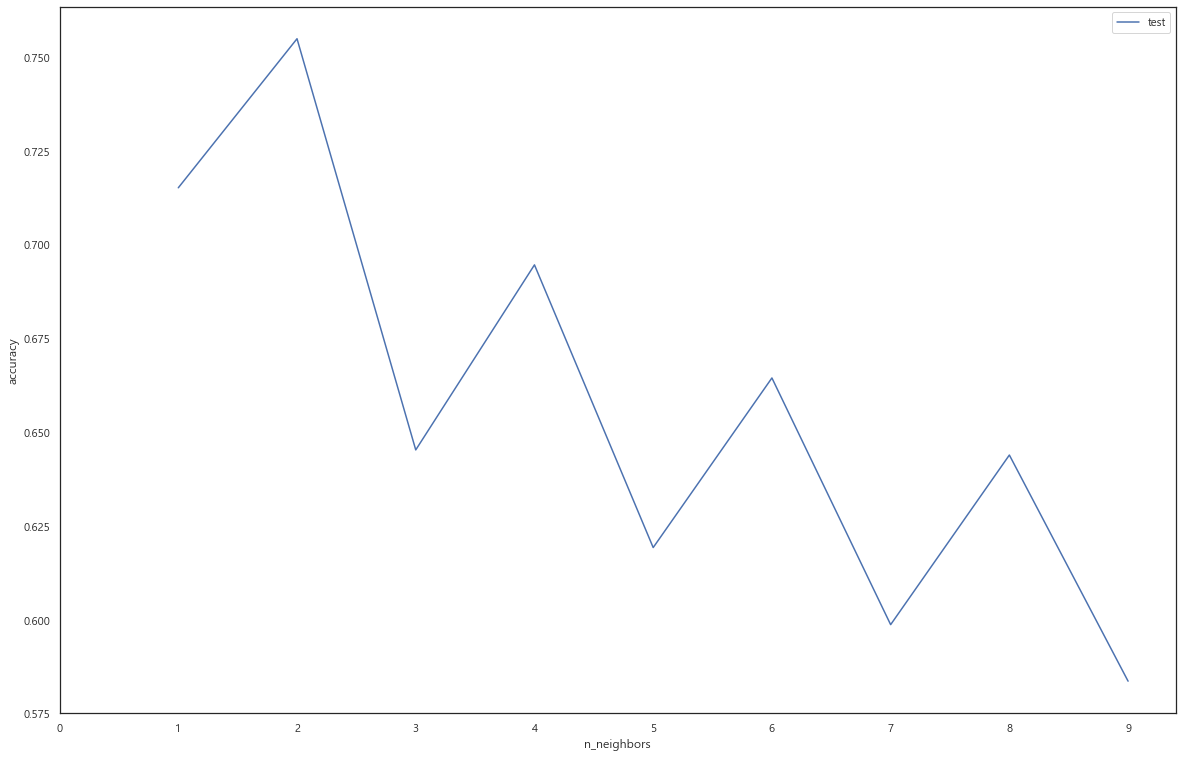

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#k별로 정확도 비교
plt.figure()
plt.plot(range(1,10),test_acc,label='test')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(0,10,step=1))
plt.legend()
plt.show()

In [ ]:
#knn 학습, k=2 지정
clf=KNeighborsClassifier(2)
clf.fit(x_train2,y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
#예측
y_pred=clf.predict(x_test2)

In [ ]:
#성능 확인
cmat=confusion_matrix(y_test,y_pred)
print(cmat)

[[521 104]
 [ 75  30]]


In [ ]:
#accuracy
acc=accuracy_score(y_test,y_pred)
acc

0.7547945205479452

In [ ]:
#f1-score
f1 = f1_score(y_test, y_pred, average='macro') 

In [ ]:
#accuracy, f1-score 출력
print(f"f1:{f1:4f} accuracy:{acc:.4f}")

f1:0.552222 accuracy:0.7548


# 랜덤포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 100,
                               max_depth = 15,
                                n_jobs = -1,
                                 verbose = 1,
                               random_state = 101)
#랜덤포레스트 학습
rf_clf.fit(x_train2, y_train)
pred = rf_clf.predict(x_test2)

#정확도, f1-score 확인
accuracy = accuracy_score(y_test, pred) 
f1 = f1_score(y_test,pred,average='macro') 

print(f"f1:{f1:4f} accuracy:{accuracy:.4f}")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


f1:0.538864 accuracy:0.7164


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
cmat=confusion_matrix(y_test,y_pred)
print(cmat)

[[521 104]
 [ 75  30]]


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'n_estimators' : [100, 200],
          'max_depth' : [6, 8, 10, 12],
         'min_samples_leaf' : [8,12,18],
         'min_samples_split' : [8, 16, 20]}

rf_clf4 = RandomForestClassifier(random_state = 103,
                                 n_jobs = -1,
                                 verbose = 1)
grid_cv1 = GridSearchCV(rf_clf4,
                       param_grid = params,
                       n_jobs = -1,
                       verbose = 1,
                       cv=3)

grid_cv1.fit(x_train2, y_train)

grid_cv2 = GridSearchCV(rf_clf4,
                       param_grid = params,
                       n_jobs = -1,
                       verbose = 1,
                       cv=3,
                       scoring='f1')

grid_cv2.fit(x_train2, y_train)
#f1스코어 모델 기준 예측값
pred=grid_cv2.predict(x_test2)

print('최적 하이퍼 마라미터: ', grid_cv1.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv1.best_score_))
print('최적 하이퍼 마라미터: ', grid_cv2.best_params_)
print('최고 f1-score: {:.4f}'.format(grid_cv2.best_score_))

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s


최적 하이퍼 마라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
최고 예측 정확도: 0.7715
최적 하이퍼 마라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 f1-score: 0.7777


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
cmat=confusion_matrix(y_test,y_pred)
print(cmat)

[[521 104]
 [ 75  30]]


# boosting - xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score,accuracy_score

evals = [(x_test2, y_test)]
#파라미터지정 
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1,
                           max_depth=3)

#학습
xgb_wrapper.fit(x_train2, y_train, early_stopping_rounds=200,
               eval_set=evals, eval_metric='logloss')

#예측
preds = xgb_wrapper.predict(x_test2)
preds_proba = xgb_wrapper.predict_proba(x_test2)[:, 1]
print(preds_proba[:10])

#정확도, f1-score 확인
accuracy = accuracy_score(y_test,preds)
f1 = f1_score(y_test,preds,average='macro')

print(f"f1:{f1:4f} accuracy:{accuracy:.4f}")


[0]	validation_0-logloss:0.68753
[1]	validation_0-logloss:0.68419
[2]	validation_0-logloss:0.68119
[3]	validation_0-logloss:0.67887
[4]	validation_0-logloss:0.67709
[5]	validation_0-logloss:0.67605
[6]	validation_0-logloss:0.67311
[7]	validation_0-logloss:0.67173
[8]	validation_0-logloss:0.67162
[9]	validation_0-logloss:0.67071
[10]	validation_0-logloss:0.66950
[11]	validation_0-logloss:0.66922
[12]	validation_0-logloss:0.66842
[13]	validation_0-logloss:0.66689
[14]	validation_0-logloss:0.66708
[15]	validation_0-logloss:0.66578
[16]	validation_0-logloss:0.66617
[17]	validation_0-logloss:0.66566


C:\Users\i0797\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\i0797\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-logloss:0.66505
[19]	validation_0-logloss:0.66430
[20]	validation_0-logloss:0.66425
[21]	validation_0-logloss:0.66444
[22]	validation_0-logloss:0.66232
[23]	validation_0-logloss:0.66173
[24]	validation_0-logloss:0.66035
[25]	validation_0-logloss:0.65984
[26]	validation_0-logloss:0.65882
[27]	validation_0-logloss:0.65845
[28]	validation_0-logloss:0.65899
[29]	validation_0-logloss:0.65818
[30]	validation_0-logloss:0.65852
[31]	validation_0-logloss:0.65781
[32]	validation_0-logloss:0.65641
[33]	validation_0-logloss:0.65632
[34]	validation_0-logloss:0.65632
[35]	validation_0-logloss:0.65654
[36]	validation_0-logloss:0.65522
[37]	validation_0-logloss:0.65430
[38]	validation_0-logloss:0.65392
[39]	validation_0-logloss:0.65377
[40]	validation_0-logloss:0.65270
[41]	validation_0-logloss:0.65350
[42]	validation_0-logloss:0.65151
[43]	validation_0-logloss:0.65075
[44]	validation_0-logloss:0.65138
[45]	validation_0-logloss:0.65044
[46]	validation_0-logloss:0.64939
[47]	validatio

[255]	validation_0-logloss:0.58966
[256]	validation_0-logloss:0.58958
[257]	validation_0-logloss:0.59009
[258]	validation_0-logloss:0.59000
[259]	validation_0-logloss:0.58992
[260]	validation_0-logloss:0.59008
[261]	validation_0-logloss:0.58981
[262]	validation_0-logloss:0.58974
[263]	validation_0-logloss:0.58966
[264]	validation_0-logloss:0.59004
[265]	validation_0-logloss:0.59005
[266]	validation_0-logloss:0.59008
[267]	validation_0-logloss:0.59017
[268]	validation_0-logloss:0.59051
[269]	validation_0-logloss:0.59068
[270]	validation_0-logloss:0.59030
[271]	validation_0-logloss:0.59016
[272]	validation_0-logloss:0.59025
[273]	validation_0-logloss:0.58924
[274]	validation_0-logloss:0.58934
[275]	validation_0-logloss:0.58924
[276]	validation_0-logloss:0.58937
[277]	validation_0-logloss:0.59031
[278]	validation_0-logloss:0.58983
[279]	validation_0-logloss:0.58912
[280]	validation_0-logloss:0.58931
[281]	validation_0-logloss:0.58908
[282]	validation_0-logloss:0.58852
[283]	validation_0-l

In [ ]:
cmat=confusion_matrix(y_test,y_pred)
print(cmat)

[[521 104]
 [ 75  30]]


In [ ]:
#예측값
xgb_wrapper.predict(x_test2)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,

In [ ]:
print("##########################################")

## GridSearchCV 이용해서 교차검증&최적의 파라미터 찾기
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [3,5,8,10,15] ,
    'n_estimators':[100,2003],
    'learning_rate':[0.01,0.05, 0.1],
    'gamma': [0.5,1,2,3], 
    'colsample_bytree' : [0.8,0.9],
    'random_state':[99]
}


grid_cv = GridSearchCV(xgb_wrapper, param_grid=params,
                      n_jobs=-1, cv=3, verbose=1)
grid_cv.fit(x_train2, y_train)
grid_cv2 = GridSearchCV(xgb_wrapper, param_grid=params,
                      n_jobs=-1, cv=3, verbose=1, scoring='f1')
grid_cv2.fit(x_train2, y_train)

pred = grid_cv2.predict(x_test2) #f1스코어기준 모델의 예측값

print("최적의 파라미터:", grid_cv.best_params_)
print("최고의 정확도 :", grid_cv.best_score_)
print("최적의 파라미터:", grid_cv2.best_params_)
print("최고의 f1socre :", grid_cv2.best_score_)

##########################################
Fitting 3 folds for each of 240 candidates, totalling 720 fits
Fitting 3 folds for each of 240 candidates, totalling 720 fits
최적의 파라미터: {'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 2003, 'random_state': 99}
최고의 정확도 : 0.8396892655367232
최적의 파라미터: {'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 2003, 'random_state': 99}
최고의 f1socre : 0.8366830022663952


In [ ]:
cmat=confusion_matrix(y_test,y_pred)
print(cmat)

[[521 104]
 [ 75  30]]


In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

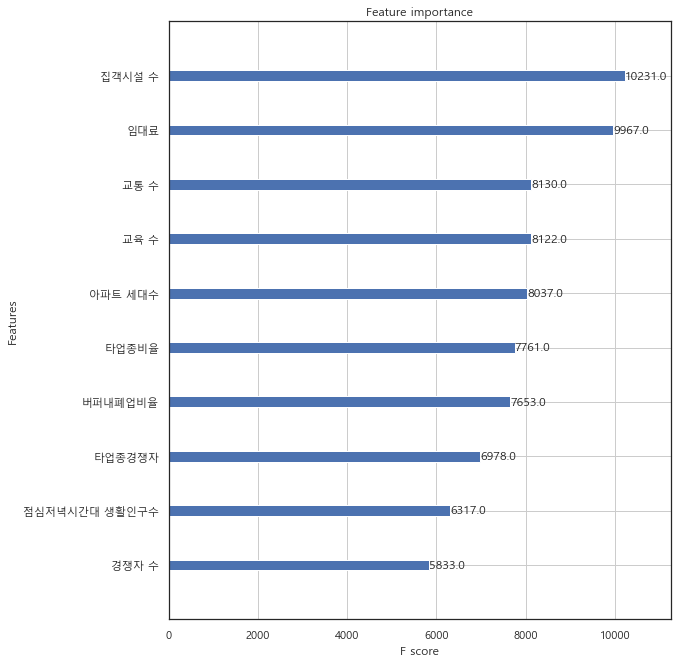

In [ ]:
# feature별 중요도 시각화하기
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(9,11))
plot_importance(grid_cv2.best_estimator_, ax)


# 결과

다중공선성 제외변수 :  인허가 영업+폐업, 인허가 영업, 인허가 폐업, 소재지면적, 총생활인구수
로지스틱 제외변수 : 골목상권, 관광특구, 구분불가,발달상권, 전통시장

<최종 변수>
:  교통 수/버퍼내폐업비율/아파트 세대수/타업종경쟁자/타업종비율/교육 수/	
임대료/집객시설 수/총생활인구수/경쟁자 수


<모형>
(accuracy/F1 score)
LR : 0.7945/0.7871

KNN : 0.7384/0.7726

RF : 0.7247/0.7511

RF(GridCV) :0.7549/0.7618

XGB : 0.7123/0.7573

XGb(GridCV) : 0.8315/0.8319


<변수 중요도>
집객시설 수>임대료>교통 수>아파트 세대수>타업종비율>교육 수>버퍼내폐업비율>경쟁자 수>타업종경쟁자>점심저녁시간대 생활인구수


<주요 변수와 생존의 관계>

집객시설 수↑ 생존확률 1.1491배↑
임대료↑ 생존확률 2.1862배↑
교통 수↑ 생존확률 1.2745배↑

## 예측

In [ ]:
#예측할 데이터 불러오기
forecast = pd.read_csv('영업경양식예측.csv', encoding='cp949') #csv 불러오기

In [102]:
#예측할 데이터 불러오기-코랩용
#forecast = pd.read_csv('/content/drive/MyDrive/bigdata/영업일식예측.csv', encoding='cp949') #csv 불러오기

,경쟁자 수,교육 수,교통 수,버퍼내폐업비율,아파트 세대수,임대료,점심저녁시간대 생활인구수,집객시설 수,타업종경쟁자,타업종비율
0,26,151,90,0.560976,8886,899,10936.29824,10,1204,0.978862
1,151,127,100,0.522745,1981,933,18597.21201,15,2443,0.941789
2,142,117,92,0.510719,2112,809,18597.21201,15,2237,0.940311
3,77,227,96,0.513248,16334,401,24802.59456,12,1244,0.941711
4,81,250,98,0.512593,16536,1894,24802.59456,14,1269,0.940000


In [103]:
forecast.head()

,경쟁자 수,교육 수,교통 수,버퍼내폐업비율,아파트 세대수,임대료,점심저녁시간대 생활인구수,집객시설 수,타업종경쟁자,타업종비율
0,26,151,90,0.560976,8886,899,10936.29824,10,1204,0.978862
1,151,127,100,0.522745,1981,933,18597.21201,15,2443,0.941789
2,142,117,92,0.510719,2112,809,18597.21201,15,2237,0.940311
3,77,227,96,0.513248,16334,401,24802.59456,12,1244,0.941711
4,81,250,98,0.512593,16536,1894,24802.59456,14,1269,0.940000


In [104]:
#데이터에 상수항 추가
kf = sm.add_constant(forecast, has_constant="add")
kf

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,경쟁자 수,교육 수,교통 수,버퍼내폐업비율,아파트 세대수,임대료,점심저녁시간대 생활인구수,집객시설 수,타업종경쟁자,타업종비율
0,1.0,26,151,90,0.560976,8886,899,10936.29824,10,1204,0.978862
1,1.0,151,127,100,0.522745,1981,933,18597.21201,15,2443,0.941789
2,1.0,142,117,92,0.510719,2112,809,18597.21201,15,2237,0.940311
3,1.0,77,227,96,0.513248,16334,401,24802.59456,12,1244,0.941711
4,1.0,81,250,98,0.512593,16536,1894,24802.59456,14,1269,0.940000
...,...,...,...,...,...,...,...,...,...,...,...
2807,1.0,70,241,62,0.534578,8358,949,24113.64599,13,1376,0.951591
2808,1.0,70,315,69,0.527420,9158,931,24113.64599,14,1407,0.952607
2809,1.0,51,327,68,0.536920,17459,806,24113.64599,10,897,0.946203
2810,1.0,51,327,68,0.536920,17459,1550,24113.64599,12,897,0.946203


In [108]:
xgb_wrapper1 = XGBClassifier(colsample_bytree = 0.8, 
                            gamma = 0.5, learning_rate = 0.1, max_depth = 10, n_estimators = 200, random_state = 99)
# eval_metric넣어주면서 검증 데이터로 loss 측정할 때 사용할 metric 지정
xgb_wrapper1.fit(x_train2, y_train,  eval_metric='logloss')

kfpred = xgb_wrapper1.predict(kf)
kfpred_proba = xgb_wrapper1.predict_proba(kf)[:, 1]
print(kfpred_proba[:10])

kfpred

[0.01272697 0.01272697 0.01272697 0.01272697 0.01272697 0.01177517
 0.01177517 0.01177517 0.01177517 0.01177517]


array([0, 0, 0, ..., 0, 0, 0])

In [109]:
live = pd.DataFrame(kfpred)

live.to_csv('/content/drive/MyDrive/bigdata/일식_생존여부.csv',index=False,encoding='cp949') 

In [110]:
result = pd.read_csv('/content/drive/MyDrive/bigdata/일식_생존여부.csv')
print(result)

      0
0     0
1     0
2     0
3     0
4     0
...  ..
2807  0
2808  0
2809  0
2810  0
2811  0

[2812 rows x 1 columns]


In [111]:
live2 = pd.DataFrame(kfpred_proba)

In [112]:
live2.to_csv('/content/drive/MyDrive/bigdata/일식_생존확률.csv',index=False,encoding='cp949') 

In [113]:
result1 = pd.read_csv('/content/drive/MyDrive/bigdata/일식_생존확률.csv')
print(result1)

             0
0     0.012727
1     0.012727
2     0.012727
3     0.012727
4     0.012727
...        ...
2807  0.012727
2808  0.012727
2809  0.012727
2810  0.012727
2811  0.012727

[2812 rows x 1 columns]
